In [1]:
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt


def calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class):
    min_distances = np.zeros(len(calc_arg_maxs))
    for i in range(len(calc_arg_maxs)):
        dist = pred_arg_maxs[i] - calc_arg_maxs[i]
        if np.abs((num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i]))<np.abs(dist):
            dist =(num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i])
        if np.abs(-(num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i]))<np.abs(dist):
            dist = -(num_class - 1) + (pred_arg_maxs[i] - calc_arg_maxs[i])
        min_distances[i] = dist
    return min_distances

def calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class):
    
    calc_argmaxs_distances = np.min(
         np.stack(
            [np.abs(pred_arg_maxs-calc_arg_maxs), ((num_class - 1) - np.abs(pred_arg_maxs-calc_arg_maxs))]
        ), axis=0)

    return calc_argmaxs_distances




In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from cpmix_utils import weight_fun, calc_weights, calc_min_distances_discrete, calculate_metrics

In [3]:
filenames = [f'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{i}' for i in range(2,51)]

In [4]:
def get_filename_for_class(class_num, subset=None):
    d = f'../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_{class_num}'
    if subset:
        d += "_WEIGHTS_SUBS" + str(subset)
    return d

In [5]:
def load_data(num_class):
    directory = get_filename_for_class(num_class)
    calc_w = np.load(os.path.join(directory, 'softmax_calc_w.npy'))
    preds_w = np.load(os.path.join(directory, 'softmax_preds_w.npy'))
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    return pred_arg_maxs, calc_arg_maxs

# Check different num classes

In [15]:
for num_class in range(2, 40):
    pred_arg_maxs, calc_arg_maxs = load_data(num_class)
    res1 = calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class)
    min_distances = calc_min_distances_discrete(pred_arg_maxs, calc_arg_maxs, num_class) # Function from cpmix_utils
    res1_vs_utils = np.all(min_distances==res1)
    print('Num classes: {} Unique values: {} min_value: {} max_value {} mean {:.4f} std {:.4f}'
          .format(num_class, len(np.unique(res1)), np.min(res1), np.max(res1), 
                  np.mean(res1), np.std(res1)))
    
    res2 = calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class)
    # calc_argmaxs_distances1 is more general (it preserves direction) --> np.abs(res1) 
    abs_res1_vs_res2 = np.all(np.abs(res1)==res2)
    print('res1_vs_utils: {} abs_res1_vs_res2: {}'.format(res1_vs_utils, abs_res1_vs_res2))

Num classes: 2 Unique values: 1 min_value: 0.0 max_value 0.0 mean 0.0000 std 0.0000
res1_vs_utils: True abs_res1_vs_res2: True
Num classes: 3 Unique values: 3 min_value: -1.0 max_value 1.0 mean -0.0143 std 0.4656
res1_vs_utils: True abs_res1_vs_res2: True
Num classes: 4 Unique values: 3 min_value: -1.0 max_value 1.0 mean -0.0068 std 0.5296
res1_vs_utils: True abs_res1_vs_res2: True
Num classes: 5 Unique values: 5 min_value: -2.0 max_value 2.0 mean 0.0063 std 0.6740
res1_vs_utils: True abs_res1_vs_res2: True
Num classes: 6 Unique values: 5 min_value: -2.0 max_value 2.0 mean 0.0056 std 0.7879
res1_vs_utils: True abs_res1_vs_res2: True
Num classes: 7 Unique values: 7 min_value: -3.0 max_value 3.0 mean -0.0070 std 0.9345
res1_vs_utils: True abs_res1_vs_res2: True
Num classes: 8 Unique values: 7 min_value: -3.0 max_value 3.0 mean -0.0204 std 1.0540
res1_vs_utils: True abs_res1_vs_res2: True
Num classes: 9 Unique values: 9 min_value: -4.0 max_value 4.0 mean 0.0007 std 1.2017
res1_vs_utils: T

# Num class 10

In [16]:
num_class = 10
pred_arg_maxs, calc_arg_maxs = load_data(num_class)

In [17]:
res1 = calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class)
res2 = calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class)

In [18]:
#res1 = np.abs(res1) # calc_argmaxs_distances1 is more general (it preserves direction)

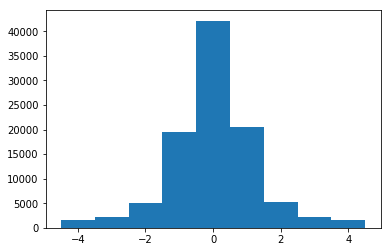

In [19]:
bins = np.array(list(range(int(np.min(res1)), int(np.max(res1)+2)))) -0.5
_= plt.hist(res1, bins=bins)

In [20]:
res1.mean()

0.0127

In [21]:
min(res1), max(res1)

(-4.0, 4.0)

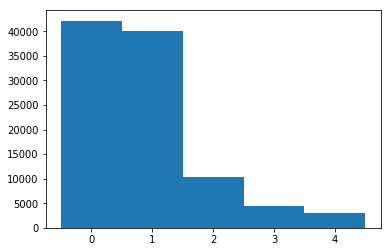

In [22]:
bins = np.array(list(range(int(np.min(res2)), int(np.max(res2)+2)))) -0.5
_= plt.hist(res2, bins=bins)

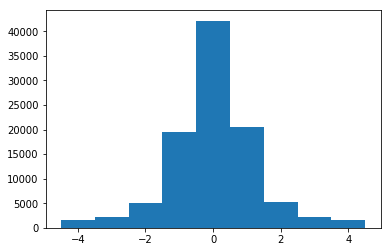

In [23]:
min_distances = calc_min_distances_discrete(pred_arg_maxs, calc_arg_maxs, num_class)
bins = np.array(list(range(int(np.min(min_distances)), int(np.max(min_distances)+2)))) -0.5
_= plt.hist(min_distances, bins=bins)

In [24]:
np.all(res1==res2)

False

# Num class 11

In [25]:
num_class = 11
pred_arg_maxs, calc_arg_maxs = load_data(num_class)
res1 = calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class)
res2 = calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class)


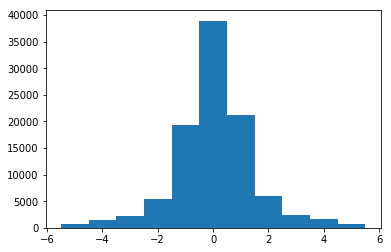

In [26]:
bins = np.array(list(range(int(np.min(res1)), int(np.max(res1)+2)))) -0.5
_= plt.hist(res1, bins=bins)

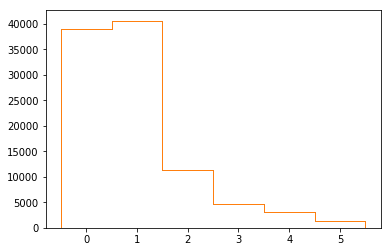

In [27]:
res1 = np.abs(res1) # calc_argmaxs_distances1 is more general (it preserves direction)
bins1 = np.array(list(range(int(np.min(res1)), int(np.max(res1)+2)))) -0.5
_= plt.hist(res1, bins1, histtype='step')
bins2 = np.array(list(range(int(np.min(res2)), int(np.max(res2)+2)))) -0.5
_= plt.hist(res2, bins=bins2, histtype='step')

# Num class 31

In [28]:
num_class = 31
pred_arg_maxs, calc_arg_maxs = load_data(num_class)
res1 = calc_argmaxs_distances1(pred_arg_maxs, calc_arg_maxs, num_class)
res2 = calc_argmaxs_distances2(pred_arg_maxs, calc_arg_maxs, num_class)


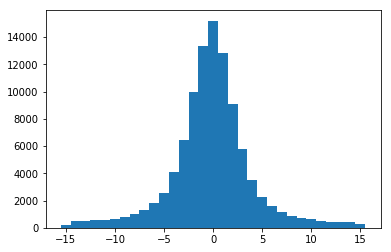

In [29]:
bins = np.array(list(range(int(np.min(res1)), int(np.max(res1)+2)))) -0.5
_= plt.hist(res1, bins=bins)

In [30]:
min(res1), max(res1)

(-15.0, 15.0)

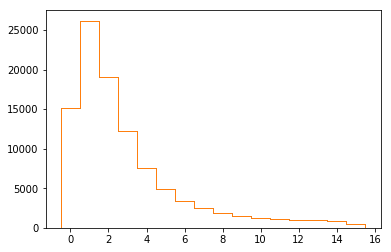

In [31]:
res1 = np.abs(res1) # calc_argmaxs_distances1 is more general (it preserves direction)
bins1 = np.array(list(range(int(np.min(res1)), int(np.max(res1)+2)))) -0.5
_= plt.hist(res1, bins1, histtype='step')
bins2 = np.array(list(range(int(np.min(res2)), int(np.max(res2)+2)))) -0.5
_= plt.hist(res2, bins=bins2, histtype='step')